#London Bikes Sharing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar 
%matplotlib inline
import seaborn as sns
import matplotlib.dates as mdates
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import mean_squared_error
from math import sqrt
from datetime import datetime


In [2]:
bikes = pd.read_csv('london_merged.csv')
bikes.head(10)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0
5,2015-01-04 05:00:00,46,2.0,2.0,93.0,4.0,1.0,0.0,1.0,3.0
6,2015-01-04 06:00:00,51,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
7,2015-01-04 07:00:00,75,1.0,-1.0,100.0,7.0,4.0,0.0,1.0,3.0
8,2015-01-04 08:00:00,131,1.5,-1.0,96.5,8.0,4.0,0.0,1.0,3.0
9,2015-01-04 09:00:00,301,2.0,-0.5,100.0,9.0,3.0,0.0,1.0,3.0


In [3]:
bikes.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [3]:
#convert the timestamp column from object to Date format
bikes['timestamp'] = pd.to_datetime(bikes['timestamp'])
bikes.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


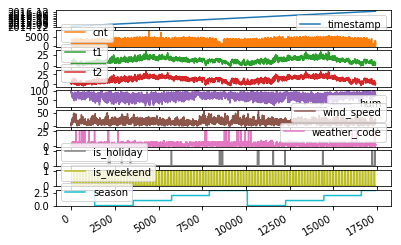

In [5]:
bikes.plot(subplots=True, legend=True)
plt.show()

In [6]:
#check for missing values
bikes.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [7]:
# Add columns with year, month, and weekday name
bikes['Year'] = bikes['timestamp'].apply(lambda x: x.year)
bikes['Month'] = bikes['timestamp'].apply(lambda x: x.month)
bikes['Day'] = bikes['timestamp'].apply(lambda x: x.day)

# Display a random sampling of 5 rows
bikes.sample(5, random_state=0)


,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,Year,Month,Day
6597,2015-10-06 21:00:00,705,15.0,15.0,94.0,5.0,7.0,0.0,0.0,2.0,2015,10,6
3181,2015-05-16 21:00:00,958,15.0,15.0,48.0,15.0,1.0,0.0,1.0,0.0,2015,5,16
15495,2016-10-15 23:00:00,497,12.0,12.0,88.0,10.0,1.0,0.0,1.0,2.0,2016,10,15
13414,2016-07-19 10:00:00,1392,28.0,28.5,51.5,12.0,1.0,0.0,0.0,1.0,2016,7,19
7921,2015-12-01 18:00:00,3073,14.0,14.0,57.0,23.0,3.0,0.0,0.0,3.0,2015,12,1


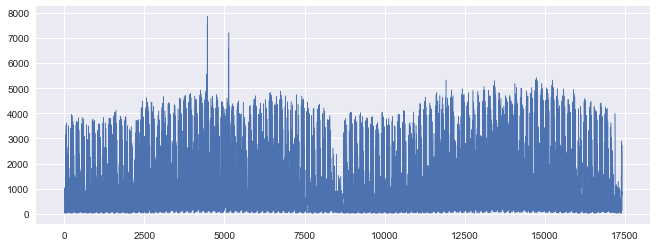

In [8]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
bikes['cnt'].plot(linewidth=0.5);

In [9]:
bike_data = bikes.drop(['timestamp'], axis=1)
bike_data.index = bikes.timestamp


In [10]:
bike_data.loc['2015-08-10']

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,Year,Month,Day
timestamp,,,,,,,,,,,,
2015-08-10 00:00:00,377,18.5,18.5,80.5,17.5,1.0,0.0,0.0,1.0,2015,8,10
2015-08-10 01:00:00,171,18.0,18.0,83.0,19.5,3.0,0.0,0.0,1.0,2015,8,10
2015-08-10 02:00:00,106,18.0,18.0,83.0,17.5,4.0,0.0,0.0,1.0,2015,8,10
2015-08-10 03:00:00,59,18.0,18.0,83.0,17.0,4.0,0.0,0.0,1.0,2015,8,10
2015-08-10 04:00:00,63,18.0,18.0,83.0,17.0,4.0,0.0,0.0,1.0,2015,8,10
2015-08-10 05:00:00,139,18.0,18.0,83.0,18.0,4.0,0.0,0.0,1.0,2015,8,10
2015-08-10 06:00:00,654,18.5,18.5,80.5,19.0,3.0,0.0,0.0,1.0,2015,8,10
2015-08-10 07:00:00,2068,19.0,19.0,80.5,15.0,3.0,0.0,0.0,1.0,2015,8,10
2015-08-10 08:00:00,4109,20.0,20.0,75.5,15.0,3.0,0.0,0.0,1.0,2015,8,10


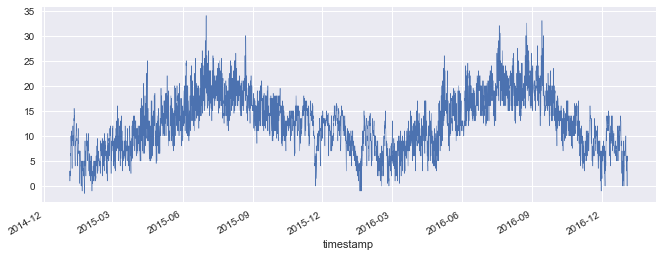

In [11]:
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(11, 4)})
bike_data['t1'].plot(linewidth=0.5);


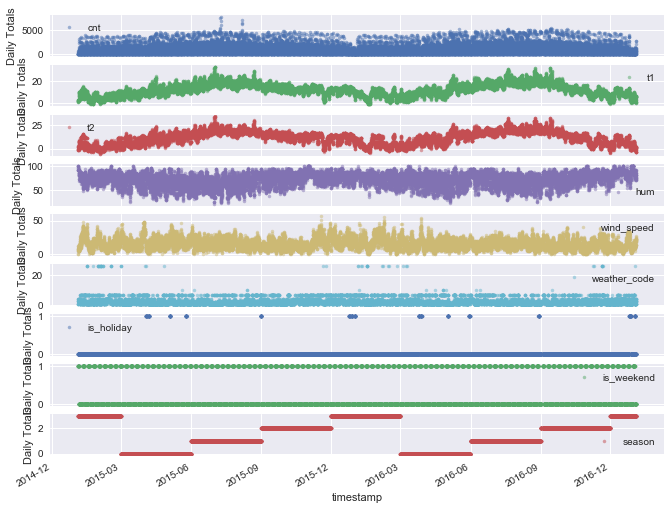

In [12]:
cols_plot = ['cnt','t1','t2','hum', 'wind_speed','weather_code','is_holiday','is_weekend','season']
axes = bike_data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals')

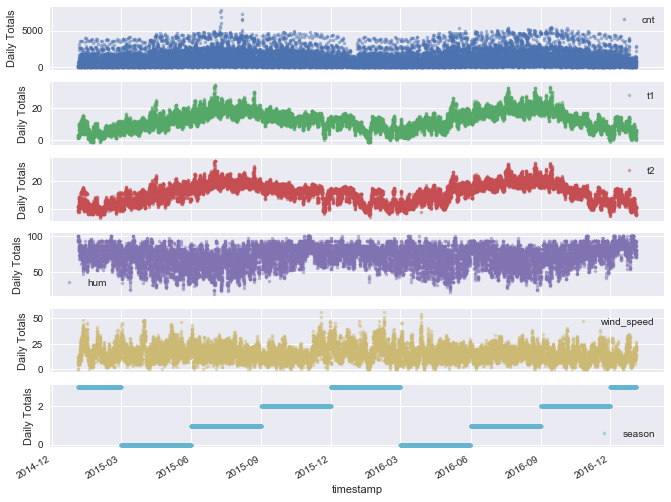

In [12]:
cols1_plot = ['cnt','t1','t2','hum', 'wind_speed','season']
axes1 = bike_data[cols1_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes1:
    ax.set_ylabel('Daily Totals')

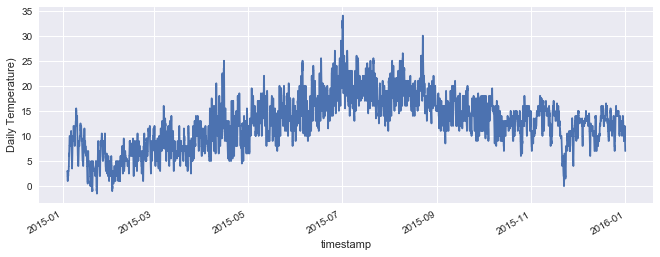

In [13]:
ax = bike_data.loc['2015', 't1'].plot()
ax.set_ylabel('Daily Temperature)');

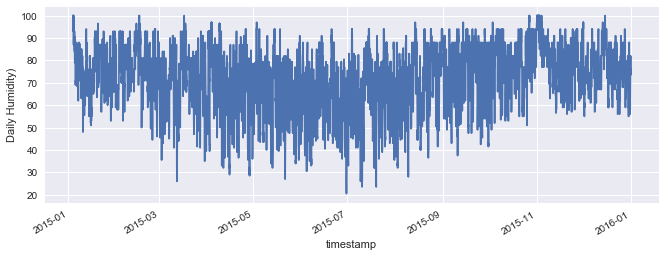

In [14]:
ax = bike_data.loc['2015', 'hum'].plot()
ax.set_ylabel('Daily Humidity)');

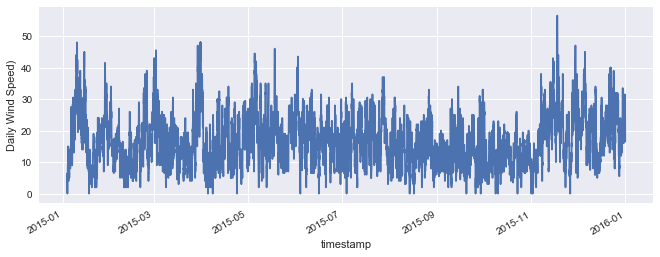

In [15]:
ax = bike_data.loc['2015', 'wind_speed'].plot()
ax.set_ylabel('Daily Wind Speed)');

In [16]:
# Specify the data columns we want to include (i.e. exclude Year, Month, Weekday Name)
data_columns = ['cnt', 't1', 'hum', 'wind_speed']
# Resample to weekly frequency, aggregating with mean
bikes_weekly_mean = bike_data[data_columns].resample('W').mean()
bikes_weekly_mean.head(10)

,cnt,t1,hum,wind_speed
timestamp,,,,
2015-01-04,384.750000,2.479167,94.270833,7.500000
2015-01-11,772.682635,9.002994,75.008982,22.715569
2015-01-18,830.708333,6.863095,73.092262,20.619048
2015-01-25,874.202381,3.434524,78.604167,11.922619
2015-02-01,793.136905,5.351190,73.446429,21.761905
2015-02-08,800.244048,3.008929,76.889881,13.633929
2015-02-15,858.670659,5.889222,81.583832,9.742515
2015-02-22,770.678571,6.020833,78.538690,15.014881
2015-03-01,837.005952,8.038690,72.654762,21.125000


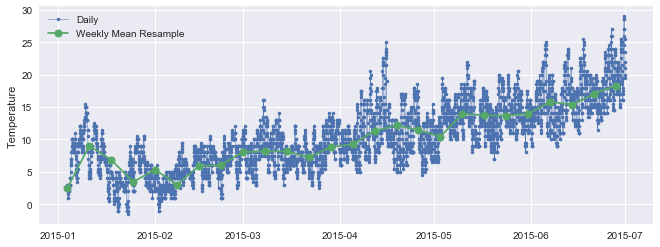

In [17]:
# Start and end of the date range to extract
start, end = '2015-01', '2015-06'
# Plot daily and weekly resampled time series together
fig, ax = plt.subplots()
ax.plot(bike_data.loc[start:end, 't1'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(bikes_weekly_mean.loc[start:end, 't1'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.set_ylabel('Temperature')
ax.legend();

In [18]:
# Compute the monthly sums, setting the value to NaN for any month which has
# fewer than 28 days of data
bikes_monthly = bike_data[data_columns].resample('M').sum(min_count=28)
bikes_monthly.head(10)

,cnt,t1,hum,wind_speed
timestamp,,,,
2015-01-31,546639,4101.0,51005.00,12502.000000
2015-02-28,543594,3721.5,51950.00,9873.500000
2015-03-31,695934,6093.5,51832.25,12938.250000
2015-04-30,831582,7873.0,48468.00,10988.500000
2015-05-31,895413,10091.5,47939.00,14268.500000
2015-06-30,1033252,12151.5,44371.50,12398.000000
2015-07-31,1120687,14107.0,46632.50,13067.000000
2015-08-31,1033951,13830.5,51913.50,10326.000000
2015-09-30,892478,10371.0,52002.00,9394.000000


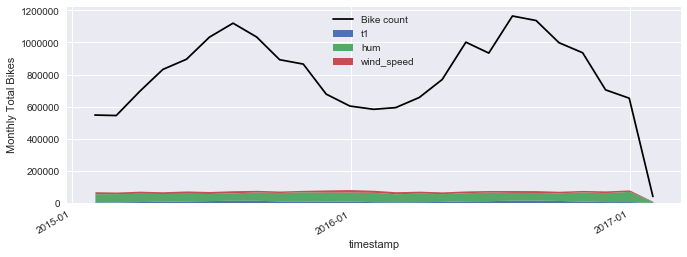

In [19]:
fig, ax = plt.subplots()
ax.plot(bikes_monthly['cnt'], color='black', label='Bike count')
bikes_monthly[['t1', 'hum','wind_speed']].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total Bikes');

In [20]:
# Compute the centered 7-day rolling mean
bikes_7d = bike_data[data_columns].rolling(7, center=True).mean()
bikes_7d.head(10)

,cnt,t1,hum,wind_speed
timestamp,,,,
2015-01-04 00:00:00,NaN,NaN,NaN,NaN
2015-01-04 01:00:00,NaN,NaN,NaN,NaN
2015-01-04 02:00:00,NaN,NaN,NaN,NaN
2015-01-04 03:00:00,95.714286,2.214286,95.5,4.071429
2015-01-04 04:00:00,80.428571,1.928571,96.5,4.214286
2015-01-04 05:00:00,79.428571,1.714286,97.0,4.642857
2015-01-04 06:00:00,103.285714,1.642857,97.5,5.928571
2015-01-04 07:00:00,168.428571,1.785714,96.5,7.642857
2015-01-04 08:00:00,265.571429,1.785714,97.5,8.428571


Rolling mean

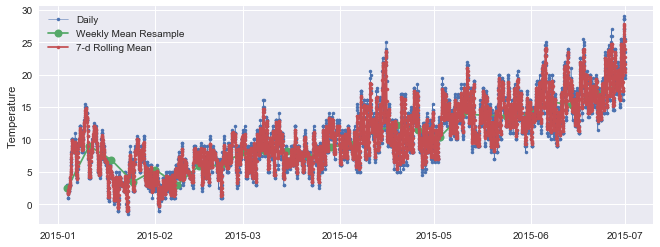

In [21]:
# Start and end of the date range to extract
start, end = '2015-01', '2015-06'
# Plot daily, weekly resampled, and 7-day rolling mean time series together
fig, ax = plt.subplots()
ax.plot(bike_data.loc[start:end, 't1'],
marker='.', linestyle='-', linewidth=0.5, label='Daily')
ax.plot(bikes_weekly_mean.loc[start:end, 't1'],
marker='o', markersize=8, linestyle='-', label='Weekly Mean Resample')
ax.plot(bikes_7d.loc[start:end, 't1'],
marker='.', linestyle='-', label='7-d Rolling Mean')
ax.set_ylabel('Temperature')
ax.legend();

Trends in the bike sharing data

In [22]:
# The min_periods=360 argument accounts for a few isolated missing days in the

bikes_365d = bike_data[data_columns].rolling(window=365, center=True, min_periods=360).mean()

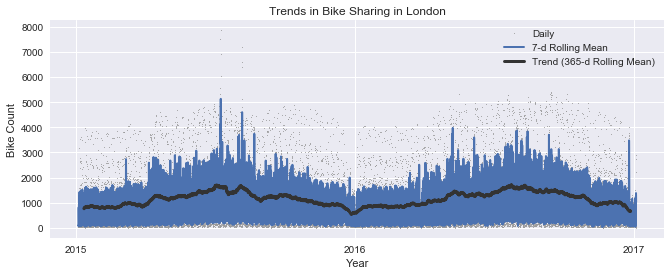

In [23]:
# Plot daily, 7-day rolling mean, and 365-day rolling mean time series
fig, ax = plt.subplots()
ax.plot(bike_data['cnt'], marker='.', markersize=2, color='0.6',
linestyle='None', label='Daily')
ax.plot(bikes_7d['cnt'], linewidth=2, label='7-d Rolling Mean')
ax.plot(bikes_365d['cnt'], color='0.2', linewidth=3,
label='Trend (365-d Rolling Mean)')
# Set x-ticks to yearly interval and add legend and labels
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_xlabel('Year')
ax.set_ylabel('Bike Count')
ax.set_title('Trends in Bike Sharing in London');

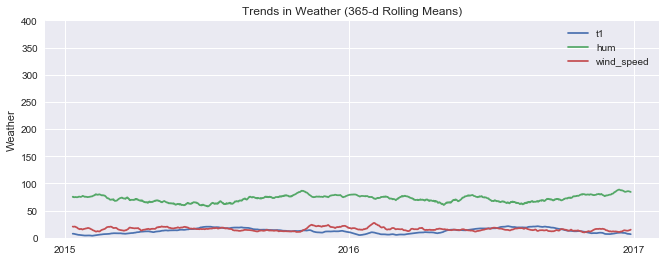

In [24]:
# Plot 365-day rolling mean time series of wind and solar power
fig, ax = plt.subplots()
for nm in ['t1', 'hum', 'wind_speed']:
    ax.plot(bikes_365d[nm], label=nm)
    # Set x-ticks to yearly interval, adjust y-axis limits, add legend and labels
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.set_ylim(0, 400)
    ax.legend()
    ax.set_ylabel('Weather')
    ax.set_title('Trends in Weather (365-d Rolling Means)');

VAR model

In [5]:
bike_data1 = bikes.drop(['timestamp'], axis=1)
bike_data1.index = bikes.timestamp
bike_data1.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [6]:
#Check stationarity of the data before applying the VAR model
from statsmodels.tsa.vector_ar.vecm import coint_johansen
coint_johansen(bike_data1,-1,1).eig

array([2.61219379e-01, 1.31970167e-01, 5.22046139e-02, 4.19830465e-02,
       2.10126207e-02, 1.75450605e-02, 1.36518877e-02, 6.26085775e-04,
       7.56291478e-05])

In [7]:
#creating the train and validation set
train = bike_data1[:int(0.8*(len(bike_data1)))]
valid = bike_data1[int(0.8*(len(bike_data1))):]

#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR

model = VAR(endog=train)
model_fit = model.fit()

# make prediction on validation
prediction = model_fit.forecast(model_fit.y, steps=len(valid))

In [28]:
print('Coefficients: %s', model_fit.params)

Coefficients: %s                           cnt         t1         t2         hum  wind_speed  \
const           -16638.706276  24.575379  24.652688 -282.843404  180.543074   
L1.cnt               0.723289   0.000123   0.000142   -0.000610    0.000133   
L1.t1               27.461877   1.021465   0.182442   -0.171077    0.000924   
L1.t2              -12.896255  -0.026818   0.834212    0.142966    0.026550   
L1.hum              -5.183414   0.011275   0.014683    0.905003    0.009208   
L1.wind_speed       -2.301983  -0.004133  -0.006323   -0.026609    0.926853   
L1.weather_code      0.473839  -0.013292  -0.018203    0.148013    0.004019   
L1.is_holiday      -86.136494   0.023797   0.044066    0.050234    0.188418   
L1.is_weekend      -65.057610   0.015394   0.015897   -0.033994    0.003589   
L1.season            0.909407  -0.031381  -0.049921    0.206365    0.068937   
L1.Year              8.534142  -0.012592  -0.012969    0.144160   -0.089487   
L1.Month            -0.285474   0.0

In [29]:
cols = bike_data1.columns
#converting predictions to dataframe
pred = pd.DataFrame(index=range(0,len(prediction)),columns=[cols])
for j in range(0,9):
    for i in range(0, len(prediction)):
       pred.iloc[i][j] = prediction[i][j]

#check rmse
for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(pred[i], valid[i])))

rmse value for cnt is :  1127.7433441515027
rmse value for t1 is :  6.047545738226142
rmse value for t2 is :  6.9197661895267455
rmse value for hum is :  14.017917715070334
rmse value for wind_speed is :  7.4946990391857895
rmse value for weather_code is :  2.1122142456231874
rmse value for is_holiday is :  0.16387526802859523
rmse value for is_weekend is :  0.450954319533616
rmse value for season is :  1.0001575027719127


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [30]:
#make final predictions on the whole dataset
model = VAR(endog=bike_data1)
model_fit = model.fit()
yhat = model_fit.forecast(model_fit.y, steps=1)
print(yhat)


[[ 3.71665527e+02  4.89920908e+00  1.01663134e+00  7.62255478e+01
   2.13197611e+01  2.55447913e+00 -5.05696518e-04  1.11618733e-02
   2.99801443e+00  2.01699998e+03  9.99240360e-01  3.09006689e+00]]


In [33]:
#print the model summary for the VAR model
model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 30, Nov, 2019
Time:                     19:01:58
--------------------------------------------------------------------
No. of Equations:         12.0000    BIC:                   -20.1974
Nobs:                     17413.0    HQIC:                  -20.2440
Log likelihood:          -119886.    FPE:                1.57827e-09
AIC:                     -20.2669    Det(Omega_mle):     1.56420e-09
--------------------------------------------------------------------
Results for equation cnt
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const              -36706.696083     20380.985276           -1.801           0.072
L1.cnt                  0.723511         0.005472          132.209           0.000
L1.t1                  26.156556         6.844713     

Visualize the predictions

Prediction for  cnt


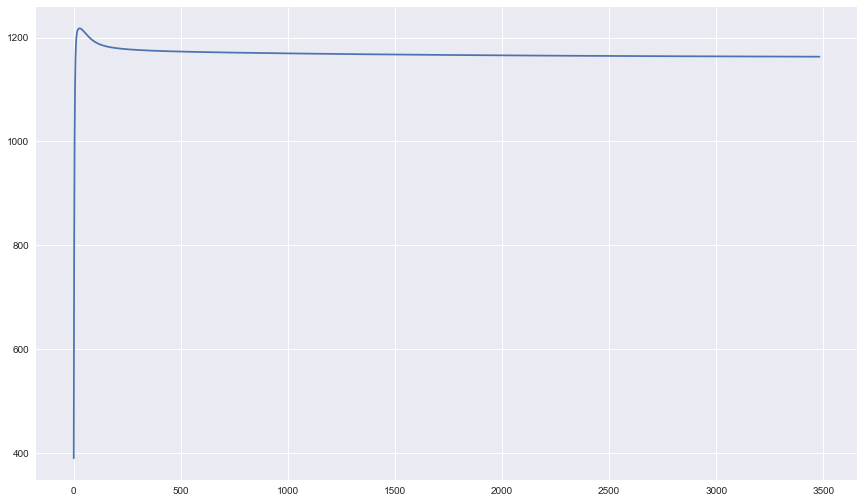

Prediction for  t1


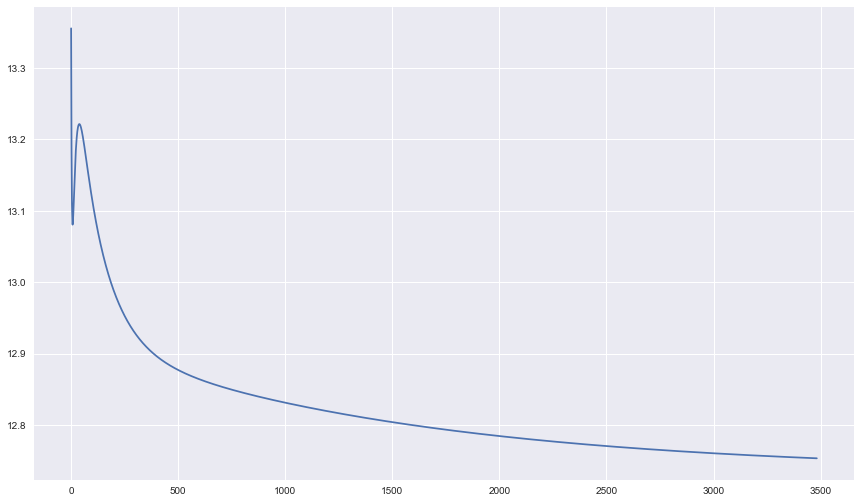

Prediction for  t2


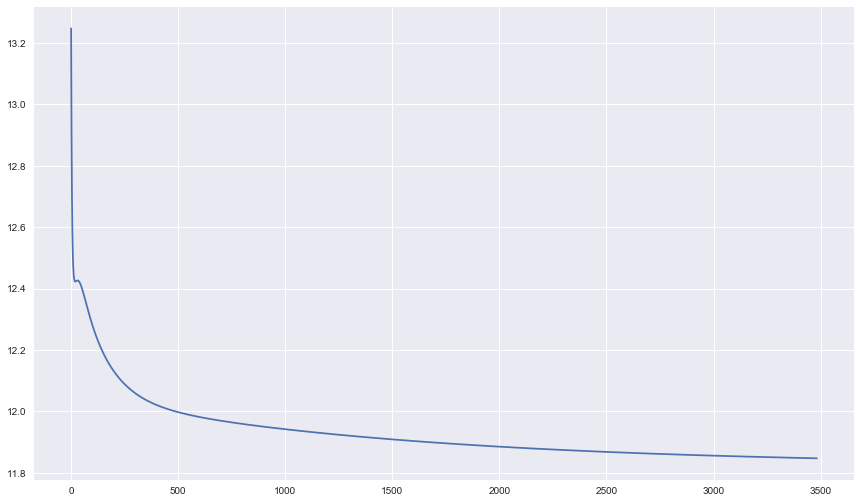

Prediction for  hum


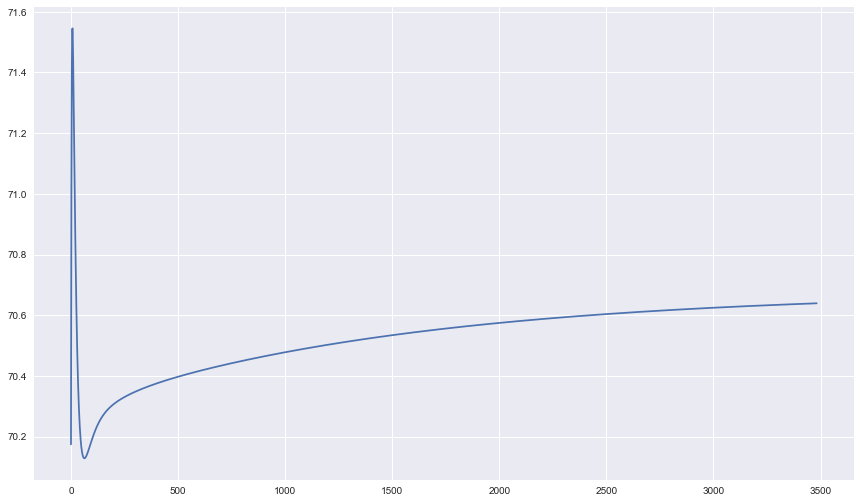

Prediction for  wind_speed


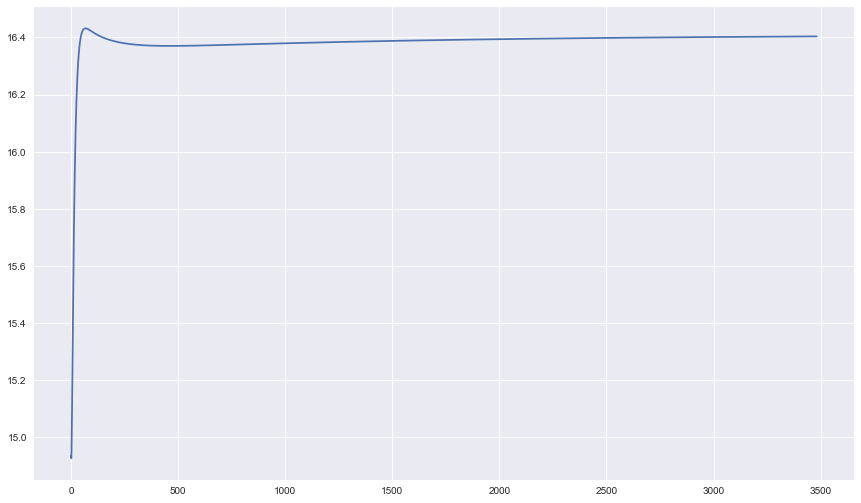

Prediction for  weather_code


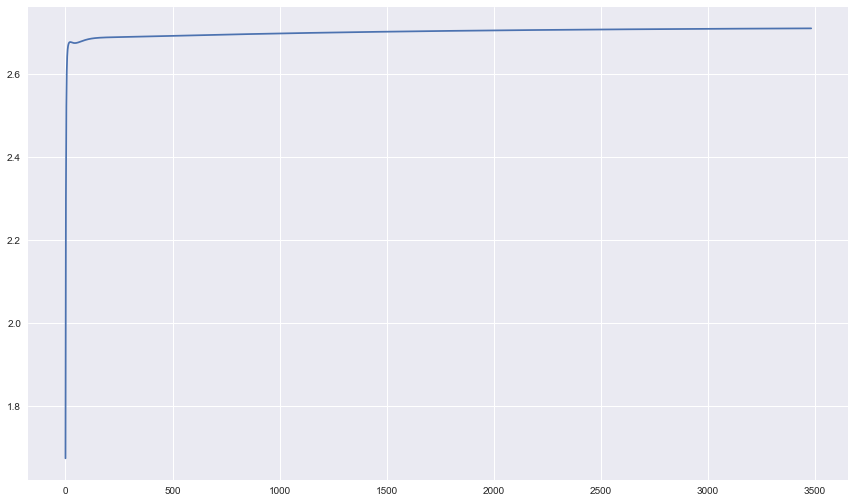

Prediction for  is_holiday


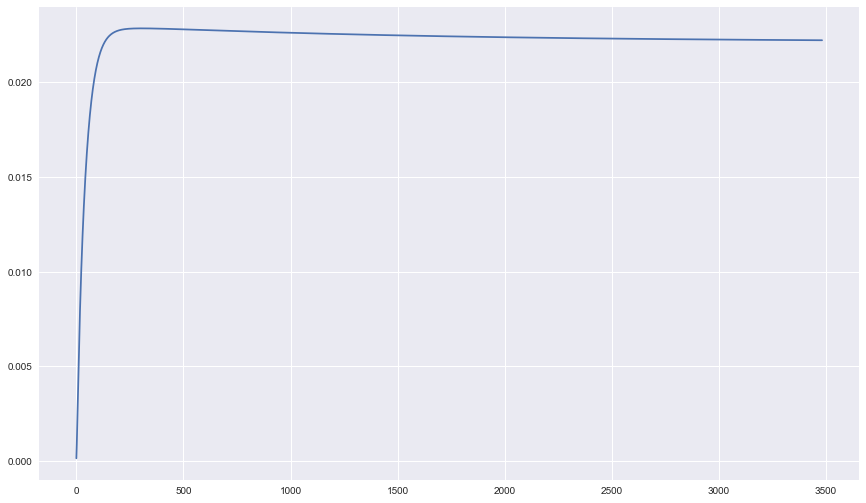

Prediction for  is_weekend


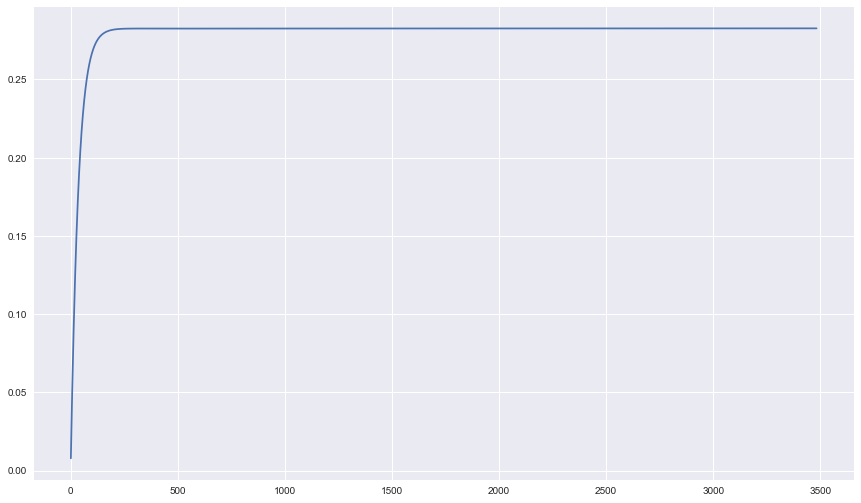

Prediction for  season


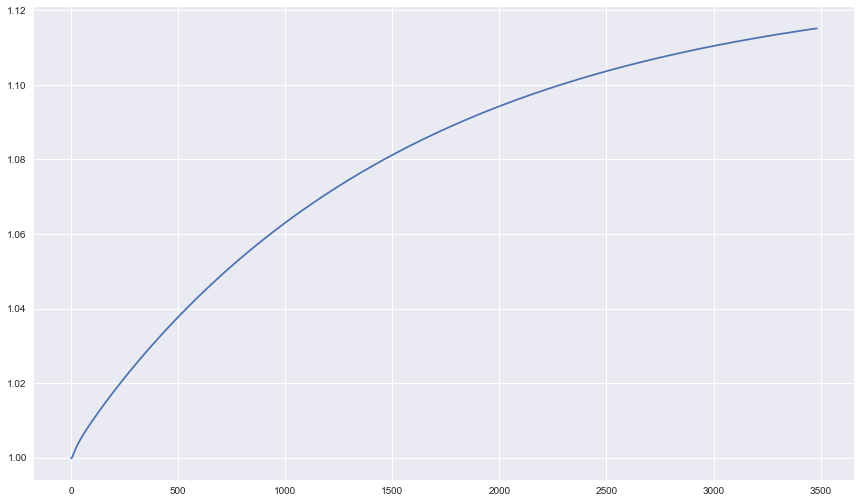

In [32]:
for i in cols:
    print("Prediction for ", i)
    plt.plot(pred[i])
    plt.show()

In [69]:
for i in cols:
 print(pred[i])

          cnt
0      389.85
1     626.567
2     794.808
3     914.375
4     999.394
5     1059.92
6     1103.09
7     1133.96
8     1156.12
9      1172.1
10    1183.69
11    1192.15
12    1198.39
13    1203.02
14     1206.5
15    1209.15
16    1211.18
17    1212.75
18    1213.98
19    1214.95
20    1215.71
21    1216.31
22    1216.78
23    1217.13
24     1217.4
25    1217.58
26     1217.7
27    1217.75
28    1217.75
29     1217.7
...       ...
3453  1163.23
3454  1163.23
3455  1163.23
3456  1163.23
3457  1163.23
3458  1163.23
3459  1163.23
3460  1163.23
3461  1163.23
3462  1163.23
3463  1163.22
3464  1163.22
3465  1163.22
3466  1163.22
3467  1163.22
3468  1163.22
3469  1163.22
3470  1163.22
3471  1163.22
3472  1163.21
3473  1163.21
3474  1163.21
3475  1163.21
3476  1163.21
3477  1163.21
3478  1163.21
3479  1163.21
3480  1163.21
3481  1163.21
3482   1163.2

[3483 rows x 1 columns]
           t1
0     13.3556
1     13.2538
2     13.1839
3     13.1375
4     13.1082
5     13.0911
6     13.

In [82]:
#print(bike_data1.loc[:, ['cnt','t1']])
print(pred.loc[:,['cnt','t1','t2','hum','wind_speed']])

          cnt       t1       t2      hum wind_speed
0      389.85  13.3556  13.2476  70.1744    14.9347
1     626.567  13.2538  13.0527  70.6695    14.9266
2     794.808  13.1839  12.9028  71.0199    14.9558
3     914.375  13.1375  12.7878  71.2574    15.0086
4     999.394  13.1082  12.6997  71.4093    15.0757
5     1059.92  13.0911  12.6321  71.4972    15.1505
6     1103.09  13.0828  12.5804  71.5382    15.2288
7     1133.96  13.0805  12.5407  71.5453    15.3076
8     1156.12  13.0825  12.5103   71.528    15.3851
9      1172.1  13.0873   12.487  71.4938    15.4599
10    1183.69  13.0939  12.4693   71.448    15.5314
11    1192.15  13.1017  12.4559  71.3944    15.5991
12    1198.39  13.1101  12.4458  71.3361    15.6628
13    1203.02  13.1187  12.4383  71.2752    15.7226
14     1206.5  13.1274  12.4328  71.2131    15.7784
15    1209.15  13.1359   12.429  71.1511    15.8304
16    1211.18  13.1441  12.4263  71.0899    15.8787
17    1212.75  13.1519  12.4246  71.0301    15.9236
18    1213.9

In [84]:
print(bike_data1.loc[:, ['cnt','t1','t2','hum','wind_speed']])

                      cnt   t1   t2    hum  wind_speed
timestamp                                             
2015-01-04 00:00:00   182  3.0  2.0   93.0         6.0
2015-01-04 01:00:00   138  3.0  2.5   93.0         5.0
2015-01-04 02:00:00   134  2.5  2.5   96.5         0.0
2015-01-04 03:00:00    72  2.0  2.0  100.0         0.0
2015-01-04 04:00:00    47  2.0  0.0   93.0         6.5
2015-01-04 05:00:00    46  2.0  2.0   93.0         4.0
2015-01-04 06:00:00    51  1.0 -1.0  100.0         7.0
2015-01-04 07:00:00    75  1.0 -1.0  100.0         7.0
2015-01-04 08:00:00   131  1.5 -1.0   96.5         8.0
2015-01-04 09:00:00   301  2.0 -0.5  100.0         9.0
2015-01-04 10:00:00   528  3.0 -0.5   93.0        12.0
2015-01-04 11:00:00   727  2.0 -1.5  100.0        12.0
2015-01-04 12:00:00   862  2.0 -1.5   96.5        13.0
2015-01-04 13:00:00   916  3.0 -0.5   87.0        15.0
2015-01-04 14:00:00  1039  2.5  0.0   90.0         8.0
2015-01-04 15:00:00   869  2.0 -1.5   93.0        11.0
2015-01-04

VARMX Model

In [31]:
#start by transforming the columns
bike_data1['count_transformed'] = np.log(bike_data1['cnt'])
bike_data1['t1_transformed'] = np.log(bike_data1['t1'])
bike_data1['hum_transformed'] = np.log(bike_data1['hum'])
bike_data1['wind_speed_transformed'] = np.log(bike_data1['wind_speed'])

#Difference the data by 1 month
n = 1
bike_data1['count_transformed_differenced'] = bike_data1['count_transformed'] - bike_data1['count_transformed'].shift(n)
bike_data1['t1_transformed_differenced'] = bike_data1['t1_transformed'] - bike_data1['t1_transformed'].shift(n)
bike_data1['hum_transformed_differenced'] = bike_data1['hum_transformed'] - bike_data1['hum_transformed'].shift(n)
bike_data1['wind_speed_transformed_differenced'] = bike_data1['wind_speed_transformed'] - bike_data1['wind_speed_transformed'].shift(n)

In [32]:
bike_data1['count_transformed'] = np.log(bike_data1['cnt'])
bike_data1['t1_transformed'] = np.log(bike_data1['t1'])
n = 1
bike_data1['count_transformed_differenced'] = bike_data1['count_transformed'] - bike_data1['count_transformed'].shift(n)
bike_data1['t1_transformed_differenced'] = bike_data1['t1_transformed'] - bike_data1['t1_transformed'].shift(n)

In [33]:
#check for stationarity
#use the Augmented Dickey Fuller Test to test the null hypothesis
#if data is stationary p-value is less than 0.5
from statsmodels.tsa.stattools import adfuller
#function to perform the adfuller statistics
def adfuller_test(timeseries):
    result  = adfuller(timeseries.values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value)) 
        
#call the function
print("Augmented Dickey Fuller Test: Bicycle Count ")
adfuller_test(train['cnt'])
print("Augmented Dickey Fuller Test: Temperature ")
adfuller_test(train['t1'])
print("Augmented Dickey Fuller Test: Humidity ")
adfuller_test(train['hum'])
print("Augmented Dickey Fuller Test: Wind speed ")
adfuller_test(train['wind_speed'])

Augmented Dickey Fuller Test: Bicycle Count 
ADF Statistic: -8.757753
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Augmented Dickey Fuller Test: Temperature 
ADF Statistic: -3.770860
p-value: 0.003220
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Augmented Dickey Fuller Test: Humidity 
ADF Statistic: -9.383573
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Augmented Dickey Fuller Test: Wind speed 
ADF Statistic: -10.686578
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [39]:
from statsmodels.tsa.statespace.varmax import VARMAX
model = VARMAX(train, order=(5, 0), trend='c')
model_result = model.fit(disp=False)
model_result.summary()

ValueError: Non-stationary starting autoregressive parameters found with `enforce_stationarity` set to True.